### Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. 

#### The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. 


##### Attribute Information:
- ID
- loc
- title
- bedroom
- bathroom
- parking_space
- price

In [755]:
# importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [756]:
train_data = pd.read_csv("Housing_dataset_train.csv")
test_data = pd.read_csv("Housing_dataset_test.csv")
sub = pd.read_csv("Sample_submission.csv")

####    Performing EDA

In [757]:
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [758]:
train_data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [759]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [760]:
train_data.groupby("bedroom").describe()

ID                                                             
          count         mean          std   min      25%     50%      75%   
bedroom                                                                     
1.0      1738.0  4271.994246  3698.212049   3.0  1417.50  2857.0  6810.75  \
2.0      1741.0  4090.759334  3570.642011   5.0  1365.00  2737.0  6357.00   
3.0      1736.0  4311.285714  3638.644690   7.0  1479.75  2827.5  7009.50   
4.0      1641.0  4219.145643  3671.159963   0.0  1421.00  2821.0  6809.00   
5.0      1789.0  4173.140861  3638.615995   0.0  1414.00  2791.0  6464.00   
6.0       908.0  6555.795154  3728.972584  12.0  3374.50  6547.5  9697.00   
7.0       888.0  6555.135135  3755.848336   0.0  3431.25  6574.0  9681.50   
8.0       877.0  6556.657925  3686.071548  11.0  3410.00  6596.0  9743.00   
9.0       883.0  6523.373726  3794.825256   2.0  3153.50  6597.0  9752.00   

                 bathroom            ... parking_space        price   
             max    count      mean  ...           75%  max   count   
bedroom                              ...                              
1.0      12962.0   1483.0  2.795684  ...           4.0  6.0  1738.0  \
2.0      12982.0   1499.0  2.765177  ...           4.0  6.0  1741.0   
3.0      12974.0   1491.0  2.833669  ...           4.0  6.0  1736.0   
4.0      12999.0   1431.0  2.790356  ...           4.0  6.0  1641.0   
5.0      12997.0   1545.0  2.757282  ...           4.0  6.0  1789.0   
6.0      12993.0    769.0  3.892068  ...           5.0  6.0   908.0   
7.0      12986.0    756.0  4.021164  ...           5.0  6.0   888.0   
8.0      12987.0    735.0  4.028571  ...           5.0  6.0   877.0   
9.0      12978.0    760.0  4.073684  ...           5.0  6.0   883.0   

                                                                                
                 mean           std           min           25%           50%   
bedroom                                                                         
1.0      1.415794e+06  7.598784e+05  4.319673e+05  9.830001e+05  1.222968e+06  \
2.0      1.594927e+06  8.204351e+05  6.346175e+05  1.153164e+06  1.386238e+06   
3.0      1.824883e+06  9.440475e+05  6.514725e+05  1.296030e+06  1.589441e+06   
4.0      2.037854e+06  9.576441e+05  7.119642e+05  1.480428e+06  1.764168e+06   
5.0      2.230842e+06  1.089130e+06  8.369657e+05  1.641860e+06  1.963196e+06   
6.0      2.583971e+06  8.546275e+05  1.502388e+06  1.980624e+06  2.346041e+06   
7.0      2.793135e+06  8.718470e+05  1.676731e+06  2.180767e+06  2.580555e+06   
8.0      3.048735e+06  9.836889e+05  1.837436e+06  2.385992e+06  2.751351e+06   
9.0      3.286542e+06  9.965510e+05  2.016139e+06  2.630645e+06  2.988185e+06   

                                     
                  75%           max  
bedroom                              
1.0      1.553742e+06  1.173973e+07  
2.0      1.745240e+06  1.245958e+07  
3.0      2.019803e+06  1.404257e+07  
4.0      2.226539e+06  1.540273e+07  
5.0      2.447297e+06  1.656849e+07  
6.0      2.934668e+06  7.162257e+06  
7.0      3.132007e+06  8.507998e+06  
8.0      3.428423e+06  8.855421e+06  
9.0      3.614496e+06  8.890611e+06  

[9 rows x 32 columns]

In [761]:
train_data.groupby("bedroom").value_counts()

bedroom  ID     loc      title                 bathroom  parking_space  price       
1.0      3      Imo      Semi-detached duplex  1.0       1.0            1.039983e+06    1
         10     Lagos    Semi-detached duplex  1.0       2.0            3.744238e+06    1
         12924  Borno    Terrace duplex        4.0       3.0            9.722837e+05    1
         12135  Bauchi   Terrace duplex        6.0       1.0            9.929640e+05    1
         12119  Sokoto   Semi-detached duplex  5.0       2.0            9.826238e+05    1
                                                                                       ..
9.0      5640   Adamawa  Flat                  6.0       2.0            2.543959e+06    1
         5605   Imo      Semi-detached duplex  6.0       4.0            3.040888e+06    1
         5584   Ondo     Bungalow              2.0       1.0            2.779404e+06    1
         5560   Taraba   Apartment             4.0       3.0            2.298311e+06    1
         12947 

In [762]:
train_data.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

#### Filling the missing values

In [763]:
train_data.bedroom.fillna(train_data["bedroom"].mean(), inplace=True)
train_data.bathroom.fillna(train_data["bathroom"].mean(), inplace=True)
train_data.parking_space.fillna(train_data["parking_space"].mean(), inplace=True)

train_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565
1,2748,Ondo,Apartment,4.308171,2.0,4.000000,1672416.689
2,9261,Ekiti,NaN,7.000000,5.0,3.169825,3364799.814
3,2224,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756
4,10300,Kogi,Terrace duplex,4.308171,5.0,6.000000,2600700.898


In [764]:
train_data.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom             0
bathroom            0
parking_space       0
price               0
dtype: int64

In [765]:

test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [766]:
sub.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [767]:
train_data.title.unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

##### Ranking "title" based on size for train dataset

In [768]:
# Define the ranking based on size (arranged from smallest to biggest)
house_type_ranks = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
train_data['title'] = train_data['title'].map(house_type_ranks)

# Print the updated dataframe
train_data.head()





,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,6.0,2.000000,2.0,1.000000,1149999.565
1,2748,Ondo,9.0,4.308171,2.0,4.000000,1672416.689
2,9261,Ekiti,NaN,7.000000,5.0,3.169825,3364799.814
3,2224,Anambra,5.0,5.000000,2.0,4.000000,2410306.756
4,10300,Kogi,4.0,4.308171,5.0,6.000000,2600700.898


##### Ranking "title" based on size for test dataset

In [769]:
house_type_rank = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
test_data['title'] = test_data['title'].map(house_type_ranks)

# Print the updated dataframe
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,8,4,1,2
1,1924,Adamawa,9,2,2,4
2,10718,Adamawa,2,2,7,2
3,12076,Lagos,10,9,5,2
4,12254,Gombe,6,5,6,1


##### Calculate the frequency of each category in the 'loc' column for train dataset

In [770]:
category_frequencies = train_data['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
train_data['loc'] = train_data['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
train_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,0.028309,6.0,2.000000,2.0,1.000000,1149999.565
1,2748,0.028227,9.0,4.308171,2.0,4.000000,1672416.689
2,9261,0.027570,NaN,7.000000,5.0,3.169825,3364799.814
3,2224,0.029786,5.0,5.000000,2.0,4.000000,2410306.756
4,10300,0.026340,4.0,4.308171,5.0,6.000000,2600700.898


##### Calculate the frequency of each category in the 'loc' column for test dataset

In [771]:
category_frequencies = test_data['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
test_data['loc'] = test_data['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,0.028333,8,4,1,2
1,1924,0.029167,9,2,2,4
2,10718,0.029167,2,2,7,2
3,12076,0.029000,10,9,5,2
4,12254,0.026333,6,5,6,1


#### Filling missing values for "loc" and "title" for train dataset

In [772]:
# train_data.loc.fillna(train_data["loc"].mode(), inplace=True)

from sklearn.impute import SimpleImputer
mode_inputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
mode_inputer = mode_inputer.fit(train_data[["loc"]])
train_data["loc"] = mode_inputer.transform(train_data[["loc"]])

mode_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
mode_imputer = mode_inputer.fit(train_data[["title"]])
train_data["title"] = mode_imputer.transform(train_data[["title"]])
train_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,0.028309,6.0,2.000000,2.0,1.000000,1149999.565
1,2748,0.028227,9.0,4.308171,2.0,4.000000,1672416.689
2,9261,0.027570,7.0,7.000000,5.0,3.169825,3364799.814
3,2224,0.029786,5.0,5.000000,2.0,4.000000,2410306.756
4,10300,0.026340,4.0,4.308171,5.0,6.000000,2600700.898


#### Separating input variables (X) and target variable (y)

In [773]:
X = train_data.drop("price", axis = 1)
y = train_data.price

In [774]:
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)
print("Shape of test data is:", test_data.shape)

Shape of X is: (14000, 6)
Shape of y is: (14000,)
Shape of test data is: (6000, 6)


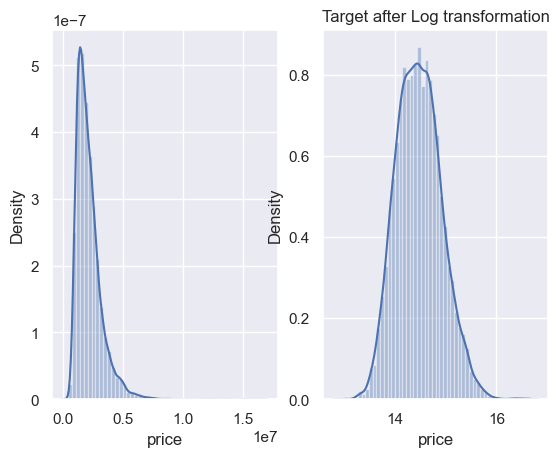

In [775]:
sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [776]:
# g = sns.pairplot(train_data, hue="price", palette="husl")

#### Train and Test Split

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 12)

#### Building ML Model

In [778]:
from sklearn.linear_model import LinearRegression

In [779]:
# creating an object for the model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train,y_train)
model_linear_regression_pred = model_linear_regression.predict(X_test)
model_linear_regression_pred

array([2185542.40070928, 1242795.70930598, 3137421.85190762, ...,
       1693321.56028438, 1949892.53166833, 3830284.19584997])

In [780]:
# svr for model building
from sklearn.svm import SVR
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train,y_train)

SVR()

In [781]:
# svr prediction
svr_model_pred = svr_model.predict(X_test)
svr_model_pred


array([1897334.00207687, 1897506.91749192, 1897169.3155351 , ...,
       1897530.88893326, 1896841.67730698, 1897182.83952883])

In [782]:

print(f'mse = {mean_squared_error(y_test, svr_model_pred, squared=False)}')


mse = 1054873.6842041158


In [783]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [784]:
#RandomForestRegressor prediction
rfr_pred = rfr.predict(X_test)

In [785]:
rfr_pred

array([2300768.76566 , 1348704.23151 , 4129443.49111 , ...,
       1616106.65847 , 1296419.503477, 2605692.54656 ])

In [786]:
y_test

5134     2115551.357
9291     1356763.962
11813    5258407.126
10775    3028390.767
5499     2503754.203
            ...     
855      2884645.747
7859     2291560.638
7026     1396048.762
12988    1523849.126
889      2618125.903
Name: price, Length: 2800, dtype: float64

In [787]:
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,0.028333,8,4,1,2
1,1924,0.029167,9,2,2,4
2,10718,0.029167,2,2,7,2
3,12076,0.029000,10,9,5,2
4,12254,0.026333,6,5,6,1


### lgbRegressor

In [788]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_preds = lgb.predict(X_test)

print(f'mse = {mean_squared_error(y_test, lgb_preds, squared=False)}')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 6
[LightGBM] [Info] Start training from score 2142486.709286
mse = 488876.37666998897


### Predicting the test dataset

In [789]:
#lgb prediction for test data
lgb_pred_test_data = lgb.predict(test_data)
lgb_pred_test_data

array([2537967.01651138, 1060105.10351719, 1264754.15495542, ...,
       1699597.78337387, 1790787.52789438, 3593476.36916623])

In [790]:
sub['price'] = lgb_pred_test_data
sub.head()

,ID,price
0,845,2.537967e+06
1,1924,1.060105e+06
2,10718,1.264754e+06
3,12076,4.634819e+06
4,12254,1.997099e+06


In [791]:
sub.to_csv('wazobia model.csv', index=False)

In [792]:
# linear regression test
model_linear_regression_test = model_linear_regression.predict(test_data)
model_linear_regression_test




array([2123027.37345069, 1845481.4631571 , 1291987.1918444 , ...,
       1457563.88600561, 2162233.34376556, 3038919.02830688])

In [793]:
# svr test
svr_model_test = svr_model.predict(test_data)
svr_model_test

array([1895664.69688295, 1895773.70978132, 1897547.47063289, ...,
       1897548.73349915, 1897518.14777257, 1897498.83779926])

In [794]:
#random forest regressor
rfr_test = rfr.predict(test_data)
rfr_test

array([2683729.22077 , 1094775.571455, 1224040.49595 , ...,
       2052031.25503 , 1820692.72583 , 3791724.87535 ])

In [795]:
from sklearn.metrics import accuracy_score
rfr.score(X_test, y_test)

0.6907930374410278

In [796]:
svr_model.score(X_test, y_test)

-0.04692926006464471

In [797]:
model_linear_regression.score(X_test, y_test)

0.39899851427098265

In [798]:
lgb.score(X_test, y_test)

0.7751387993042005

In [799]:
from sklearn import metrics
import numpy as np 
print(np.sqrt(metrics.mean_squared_error(y_test, test_data)))

ValueError: Found input variables with inconsistent numbers of samples: [2800, 6000]